### Задание

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма:
strategy, maxiter, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

#### Допзадание

Найти множество параметров (strategy=..., maxiter=..., ..., updating=...), которые требуют минимального количества итераций.

# О параметрах

Как удалось выяснить из   
https://www.coursera.org/lecture/mathematics-and-python/gienietichieskiie-alghoritmy-i-diffierientsial-naia-evoliutsiia-Do6vt ,  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html ,  
https://mai.ru/upload/iblock/f49/primenenie-metoda-differentsialnoy-evolyutsii-dlya-optimizatsii-parametrov-aerokosmicheskikh-sistem.pdf  
**maxiter** - это максимальное число поколений. Т.е. как раз та величина которую мы ищем. Следовательно трогать ее мы не будем. Она нам может пригодится только при оптимизации например.  
По умолчанию данный параметр равен 1000.  
**popsize** - размер популяции, принимается равным от 5*2 до 10*2, где 2 размерность исследуемой функции (в нащем случае 2).  
**tol** - относительная погрешность. Нам не нужна. Она конечно может уменьшить количество поколений, но уменьшит точность расчета.  
**mutation** - сила мутации от 0 до 2.
**recombination** - фактически вероятность с которой принимается или отклоняется новое поколение. От 0 до 1 соответственно.  
**strategy** и **updaiting** - параметры модели.

In [123]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

In [88]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2763
     nit: 89
 success: True
       x: array([0., 0.])

Попробуем устроить что-то типа градиентного спуска. Для этого создадим несколько словарей для выьраных параметров.

In [7]:
dict_strategy = {1: "best1bin", 2: "best1exp", 3: "rand1exp", 4: "randtobest1exp", 5: "currenttobest1exp", 6: "best2exp", 7: "rand2exp", 8: "randtobest1bin", 9: "currenttobest1bin", 10: "best2bin", 11: "rand2bin", 12: "rand1bin"}

dict_strategy

{1: 'best1bin',
 2: 'best1exp',
 3: 'rand1exp',
 4: 'randtobest1exp',
 5: 'currenttobest1exp',
 6: 'best2exp',
 7: 'rand2exp',
 8: 'randtobest1bin',
 9: 'currenttobest1bin',
 10: 'best2bin',
 11: 'rand2bin',
 12: 'rand1bin'}

In [47]:
dict_popsize = {}
dict_popsize = {count+1: int(count+11) for count in range(10)}
dict_popsize

{1: 11, 2: 12, 3: 13, 4: 14, 5: 15, 6: 16, 7: 17, 8: 18, 9: 19, 10: 20}

In [69]:
dict_mutation = {}
dict_mutation = {count+1: count*2/10 for count in range(10)}
dict_mutation


{1: 0.0,
 2: 0.2,
 3: 0.4,
 4: 0.6,
 5: 0.8,
 6: 1.0,
 7: 1.2,
 8: 1.4,
 9: 1.6,
 10: 1.8}

In [36]:
dict_recombination = {}
dict_recombination = {count+1: (count)/10 for count in range(11)}
dict_recombination

{1: 0.0,
 2: 0.1,
 3: 0.2,
 4: 0.3,
 5: 0.4,
 6: 0.5,
 7: 0.6,
 8: 0.7,
 9: 0.8,
 10: 0.9,
 11: 1.0}

In [37]:
dict_updating = {1: "immediate", 2: "deferred"}
dict_updating

{1: 'immediate', 2: 'deferred'}

Теперь будем действовать следующим образоим. Смотрим значение количества поколений в некоторой точке параметров и ее окресностях.  
Если находим меньшее значение, то переходим в эту точку и повторяем расчеты.  
До тех пор пока не "замрем" в какой-нибудь точке.

Очевидной ошибкой является использование **strategy** в качестве одного из параметров. Данный параметр вряд ли выстраивался так   
чтобы можно было плавно (с точки зрения количества поколений) переходить от одного его значения к другому.   
Здесь, мы просто развлекаемся, задача была "потрогать параметры" сделаем это. Кроме того, расчет методом градиетного спуска по   
каждому значению параметра **strategy** займет много времени

In [137]:
response = np.zeros((12,10,11,11,2))

In [138]:
matrix = np.zeros((3,3,3,3))
x = []
y = []

In [119]:
bounds = [(-10, 10), (-10, 10)]
min = 1001
i,j,k,l,m = 5,1,5,1,1
count = 1
while count > 0:
    for i_i in range(3):
        for j_j in range(3):
            for k_k in range(3):
                for l_l in range(3):
                    i_area = i + i_i - 1
                    j_area = j + j_j - 1
                    k_area = k + k_k - 1
                    l_area = l + l_l - 1
                    try:
                        dict_strategy[i_area]
                    except:
                        i_area = i
                    try:
                        dict_popsize[j_area]
                    except:
                        j_area = j
                    try:
                        dict_mutation[k_area]
                    except:
                        k_area = k
                    try:
                        dict_recombination[l_area]
                    except:
                        l_area = l
                    response = differential_evolution(ackley, bounds, strategy = dict_strategy[i_area], popsize = dict_popsize[j_area], mutation = dict_mutation[k_area], recombination = dict_recombination[l_area], seed=42, updating = dict_updating[m])
                    matrix[i_i][j_j][k_k][l_l] = response.nit
                    if response.nit < min:
                        i_min, j_min, k_min, l_min, min = i_area, j_area, k_area, l_area, response.nit 
    print(min, dict_strategy[i_min], dict_popsize[j_min], dict_mutation[k_min], dict_recombination[l_min], dict_updating[m])
    print (i-i_min, j-j_min, k-k_min, l-l_min)
    print (i, i_min, j, j_min, k, k_min, l, l_min)
    if (i == i_min) and (j == j_min) and (l == l_min) and (k == k_min):
        print ("Расчет закончен")
        break
    else:
        print('Перепрошиваем')
        i, j, k, l = i_min, j_min, k_min, l_min
        x.append(dict_recombination[l_min])
        y.append(min)

552 randtobest1exp 11 1.0 0.1 immediate
1 0 -1 -1
5 4 1 1 5 6 1 2
Перепрошиваем
289 currenttobest1exp 11 1.0 0.2 immediate
-1 0 0 -1
4 5 1 1 6 6 2 3
Перепрошиваем
207 randtobest1exp 11 1.0 0.3 immediate
1 0 0 -1
5 4 1 1 6 6 3 4
Перепрошиваем
124 randtobest1exp 11 1.0 0.4 immediate
0 0 0 -1
4 4 1 1 6 6 4 5
Перепрошиваем
61 randtobest1exp 11 1.0 0.5 immediate
0 0 0 -1
4 4 1 1 6 6 5 6
Перепрошиваем
35 currenttobest1exp 11 1.0 0.6 immediate
-1 0 0 -1
4 5 1 1 6 6 6 7
Перепрошиваем
35 currenttobest1exp 11 1.0 0.6 immediate
0 0 0 0
5 5 1 1 6 6 7 7
Расчет закончен


In [127]:
print ("nit =", min, "strategy =", dict_strategy[i], "popsize =", dict_popsize[j], "mutation =", dict_mutation[k], "recombination =", dict_recombination[l], "seed =", 42, "updating =", dict_updating[m])

nit = 35 strategy = currenttobest1exp popsize = 11 mutation = 1.0 recombination = 0.6 seed = 42 updating = immediate


Здесь нам повезло, мы сразу попали в точку из которой началось движение с уменьшением **nit**

Строим график по **recombination**

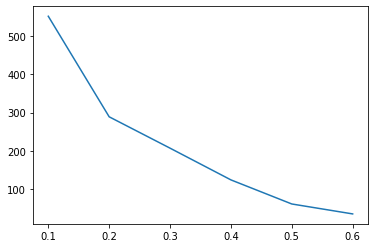

In [124]:
plt.plot(x,y)
plt.show()

Делаем еще несколько расчетов стартуя из других точек.  
Сразу отмечу, что красивого движения точки в пространстве параметров больше не получилось, хотя значения   
**nit** получились меньше

In [139]:
bounds = [(-10, 10), (-10, 10)]
min = 1001
i,j,k,l,m = 1,5,1,5,2
count = 1
while count > 0:
    for i_i in range(3):
        for j_j in range(3):
            for k_k in range(3):
                for l_l in range(3):
                    i_area = i + i_i - 1
                    j_area = j + j_j - 1
                    k_area = k + k_k - 1
                    l_area = l + l_l - 1
                    try:
                        dict_strategy[i_area]
                    except:
                        i_area = i
                    try:
                        dict_popsize[j_area]
                    except:
                        j_area = j
                    try:
                        dict_mutation[k_area]
                    except:
                        k_area = k
                    try:
                        dict_recombination[l_area]
                    except:
                        l_area = l
                    response = differential_evolution(ackley, bounds, strategy = dict_strategy[i_area], popsize = dict_popsize[j_area], mutation = dict_mutation[k_area], recombination = dict_recombination[l_area], seed=42, updating = dict_updating[m])
                    matrix[i_i][j_j][k_k][l_l] = response.nit
                    if response.nit < min:
                        i_min, j_min, k_min, l_min, min = i_area, j_area, k_area, l_area, response.nit 
    print(min, dict_strategy[i_min], dict_popsize[j_min], dict_mutation[k_min], dict_recombination[l_min], dict_updating[m])
    print (i-i_min, j-j_min, k-k_min, l-l_min)
    print (i, i_min, j, j_min, k, k_min, l, l_min)
    if (i == i_min) and (j == j_min) and (l == l_min) and (k == k_min):
        print ("Расчет закончен")
        break
    else:
        print('Перепрошиваем')
        i, j, k, l = i_min, j_min, k_min, l_min
        x.append(dict_recombination[l_min])
        y.append(min)

5 best1bin 14 0.0 0.4 deferred
0 1 0 0
1 1 5 4 1 1 5 5
Перепрошиваем
5 best1bin 14 0.0 0.4 deferred
0 0 0 0
1 1 4 4 1 1 5 5
Расчет закончен


In [129]:
print ("nit =", min, "strategy =", dict_strategy[i], "popsize =", dict_popsize[j], "mutation =", dict_mutation[k], "recombination =", dict_recombination[l], "seed =", 42, "updating =", dict_updating[m])

nit = 5 strategy = best1bin popsize = 14 mutation = 0.0 recombination = 0.4 seed = 42 updating = deferred


In [130]:
bounds = [(-10, 10), (-10, 10)]
min = 1001
i,j,k,l,m = 1,1,1,1,2
count = 1
while count > 0:
    for i_i in range(3):
        for j_j in range(3):
            for k_k in range(3):
                for l_l in range(3):
                    i_area = i + i_i - 1
                    j_area = j + j_j - 1
                    k_area = k + k_k - 1
                    l_area = l + l_l - 1
                    try:
                        dict_strategy[i_area]
                    except:
                        i_area = i
                    try:
                        dict_popsize[j_area]
                    except:
                        j_area = j
                    try:
                        dict_mutation[k_area]
                    except:
                        k_area = k
                    try:
                        dict_recombination[l_area]
                    except:
                        l_area = l
                    response = differential_evolution(ackley, bounds, strategy = dict_strategy[i_area], popsize = dict_popsize[j_area], mutation = dict_mutation[k_area], recombination = dict_recombination[l_area], seed=42, updating = dict_updating[m])
                    matrix[i_i][j_j][k_k][l_l] = response.nit
                    if response.nit < min:
                        i_min, j_min, k_min, l_min, min = i_area, j_area, k_area, l_area, response.nit 
    print(min, dict_strategy[i_min], dict_popsize[j_min], dict_mutation[k_min], dict_recombination[l_min], dict_updating[m])
    print (i-i_min, j-j_min, k-k_min, l-l_min)
    print (i, i_min, j, j_min, k, k_min, l, l_min)
    if (i == i_min) and (j == j_min) and (l == l_min) and (k == k_min):
        print ("Расчет закончен")
        break
    else:
        print('Перепрошиваем')
        i, j, k, l = i_min, j_min, k_min, l_min
        x.append(dict_recombination[l_min])
        y.append(min)

5 best1bin 11 0.0 0.0 deferred
0 0 0 0
1 1 1 1 1 1 1 1
Расчет закончен


In [131]:
print ("nit =", min, "strategy =", dict_strategy[i], "popsize =", dict_popsize[j], "mutation =", dict_mutation[k], "recombination =", dict_recombination[l], "seed =", 42, "updating =", dict_updating[m])

nit = 5 strategy = best1bin popsize = 11 mutation = 0.0 recombination = 0.0 seed = 42 updating = deferred


In [133]:
bounds = [(-10, 10), (-10, 10)]
min = 1001
i,j,k,l,m = 8,6,7,4,2
count = 1
while count > 0:
    for i_i in range(3):
        for j_j in range(3):
            for k_k in range(3):
                for l_l in range(3):
                    i_area = i + i_i - 1
                    j_area = j + j_j - 1
                    k_area = k + k_k - 1
                    l_area = l + l_l - 1
                    try:
                        dict_strategy[i_area]
                    except:
                        i_area = i
                    try:
                        dict_popsize[j_area]
                    except:
                        j_area = j
                    try:
                        dict_mutation[k_area]
                    except:
                        k_area = k
                    try:
                        dict_recombination[l_area]
                    except:
                        l_area = l
                    response = differential_evolution(ackley, bounds, strategy = dict_strategy[i_area], popsize = dict_popsize[j_area], mutation = dict_mutation[k_area], recombination = dict_recombination[l_area], seed=42, updating = dict_updating[m])
                    matrix[i_i][j_j][k_k][l_l] = response.nit
                    if response.nit < min:
                        i_min, j_min, k_min, l_min, min = i_area, j_area, k_area, l_area, response.nit 
    print(min, dict_strategy[i_min], dict_popsize[j_min], dict_mutation[k_min], dict_recombination[l_min], dict_updating[m])
    print (i-i_min, j-j_min, k-k_min, l-l_min)
    print (i, i_min, j, j_min, k, k_min, l, l_min)
    if (i == i_min) and (j == j_min) and (l == l_min) and (k == k_min):
        print ("Расчет закончен")
        break
    else:
        print('Перепрошиваем')
        i, j, k, l = i_min, j_min, k_min, l_min
        x.append(dict_recombination[l_min])
        y.append(min)

70 currenttobest1bin 15 1.0 0.2 deferred
-1 1 1 1
8 9 6 5 7 6 4 3
Перепрошиваем
70 currenttobest1bin 15 1.0 0.2 deferred
0 0 0 0
9 9 5 5 6 6 3 3
Расчет закончен


In [135]:
bounds = [(-10, 10), (-10, 10)]
min = 1001
i,j,k,l,m = 8,6,7,4,1
count = 1
while count > 0:
    for i_i in range(3):
        for j_j in range(3):
            for k_k in range(3):
                for l_l in range(3):
                    i_area = i + i_i - 1
                    j_area = j + j_j - 1
                    k_area = k + k_k - 1
                    l_area = l + l_l - 1
                    try:
                        dict_strategy[i_area]
                    except:
                        i_area = i
                    try:
                        dict_popsize[j_area]
                    except:
                        j_area = j
                    try:
                        dict_mutation[k_area]
                    except:
                        k_area = k
                    try:
                        dict_recombination[l_area]
                    except:
                        l_area = l
                    response = differential_evolution(ackley, bounds, strategy = dict_strategy[i_area], popsize = dict_popsize[j_area], mutation = dict_mutation[k_area], recombination = dict_recombination[l_area], seed=42, updating = dict_updating[m])
                    matrix[i_i][j_j][k_k][l_l] = response.nit
                    if response.nit < min:
                        i_min, j_min, k_min, l_min, min = i_area, j_area, k_area, l_area, response.nit 
    print(min, dict_strategy[i_min], dict_popsize[j_min], dict_mutation[k_min], dict_recombination[l_min], dict_updating[m])
    print (i-i_min, j-j_min, k-k_min, l-l_min)
    print (i, i_min, j, j_min, k, k_min, l, l_min)
    if (i == i_min) and (j == j_min) and (l == l_min) and (k == k_min):
        print ("Расчет закончен")
        break
    else:
        print('Перепрошиваем')
        i, j, k, l = i_min, j_min, k_min, l_min
        x.append(dict_recombination[l_min])
        y.append(min)

57 randtobest1bin 15 1.0 0.3 immediate
0 1 1 0
8 8 6 5 7 6 4 4
Перепрошиваем
57 randtobest1bin 15 1.0 0.3 immediate
0 0 0 0
8 8 5 5 6 6 4 4
Расчет закончен


**Наилучшее значение nit получено при параметрах  
strategy = best1bin popsize = 11 mutation = 0.0 recombination = 0.0 seed = 42 updating = deferred  
nit = 5**

# Спасибо, было интересно